In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

os.chdir("/nfs/a319/gy17m2a/PhD/Scripts/CatchmentAnalysis/CreateSyntheticRainfallEvents/RobertoProfiles")

In [2]:
total_event_rainfall = 59.98

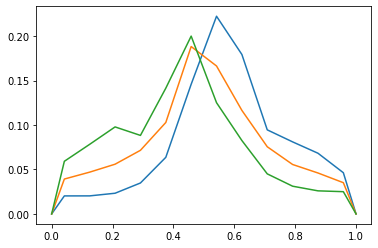

In [3]:
profiles = pd.read_csv("kmeans_15clustersPerDur.csv")

# Just 6hr profiles
profiles_6h = profiles[profiles['Duration'] =='[2:10 - 6:45) hr']
# Just centrally peaked profiles
profiles_6h_c = profiles_6h[profiles_6h['Profile_shape'] == 'C']
#  Just intensity
profiles_6h_c_irain = profiles_6h_c[profiles_6h_c['Variable'] == 'irain']
# Proportion
profiles_6h_c_prain = profiles_6h_c[profiles_6h_c['Variable'] == 'prain']

for cluster_number in profiles_6h_c_prain['Cluster'].unique():
    cluster = profiles_6h_c_prain[profiles_6h_c_prain['Cluster']==cluster_number]
    cluster = cluster.sort_values(by=['Dur_bins'])

    plt.plot(cluster['Dur_bins'], cluster['Mean'], linestyle = 'solid')
plt.show()

In [4]:
pwd

'/nfs/a319/gy17m2a/PhD/Scripts/CatchmentAnalysis/CreateSyntheticRainfallEvents/RobertoProfiles'

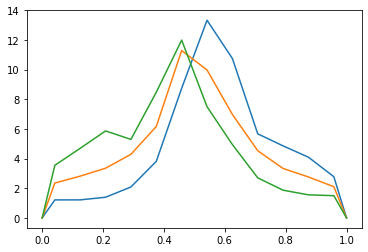

In [5]:
for cluster_number in profiles_6h_c_prain['Cluster'].unique():
    # Extract data for just this cluster
    cluster = profiles_6h_c_prain[profiles_6h_c_prain['Cluster']==cluster_number].copy()
    # Add rainfall per duration bin column
    cluster['rainfall_this_dur_bin'] = cluster['Mean'] * total_event_rainfall
    # Sort by 
    cluster = cluster.sort_values(by=['Dur_bins'])
    # Save to file
    cluster.to_csv("LinDykeProfiles/6hr_100yrRP/cluster{}.csv".format(cluster_number), index = False)
    # Add line to plot
    plt.plot(cluster['Dur_bins'], cluster['rainfall_this_dur_bin'], linestyle = 'solid')
plt.show()

In [18]:
import datetime

d = datetime.date(2022, 1, 1)

# date = pd.date_range(start = d, periods = 12, freq='30T').tolist()




cluster['date'] = pd.date_range(start = d, periods = 14, freq='30T').tolist()
cluster

,Cluster,Dur_bins,Variable,Mean,Duration,Profile_shape,Cluster_id,rainfall_this_dur_bin,date
1837,13,0.000000,prain,0.000000,[2:10 - 6:45) hr,C,13-B,0.000000,2022-01-01 00:00:00
1693,13,0.041667,prain,0.059206,[2:10 - 6:45) hr,C,13-B,3.551175,2022-01-01 00:30:00
1696,13,0.125000,prain,0.078310,[2:10 - 6:45) hr,C,13-B,4.697062,2022-01-01 01:00:00
1699,13,0.208333,prain,0.097864,[2:10 - 6:45) hr,C,13-B,5.869894,2022-01-01 01:30:00
1702,13,0.291667,prain,0.088317,[2:10 - 6:45) hr,C,13-B,5.297258,2022-01-01 02:00:00
1705,13,0.375000,prain,0.141452,[2:10 - 6:45) hr,C,13-B,8.484307,2022-01-01 02:30:00
1708,13,0.458333,prain,0.200013,[2:10 - 6:45) hr,C,13-B,11.996769,2022-01-01 03:00:00
1711,13,0.541667,prain,0.125105,[2:10 - 6:45) hr,C,13-B,7.503787,2022-01-01 03:30:00
1714,13,0.625000,prain,0.082535,[2:10 - 6:45) hr,C,13-B,4.950464,2022-01-01 04:00:00
1717,13,0.708333,prain,0.045052,[2:10 - 6:45) hr,C,13-B,2.702229,2022-01-01 04:30:00


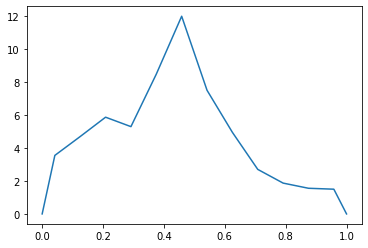

In [12]:
# Create list to store the values for each interpolated minute
all_minutes_values = []
# 
# Get the minute which each of the duration bisn refers to (is this sensical to assume these relate to a specific minutes?)
minutes = cluster['Dur_bins'] * 360

# Find the interpolated values?
y_interp = interp1d(minutes,cluster['rainfall_this_dur_bin'])

# Find the interpolated values corresponding to each minute
for i in range(0,360):
    all_minutes_values.append(y_interp(i))

# Save as dataframe
df = pd.DataFrame({'minute':range(0,360),
                   'values':all_minutes_values})


# plt.plot(df['minute'], df['values'], linestyle = 'solid')
plt.plot(cluster['Dur_bins'], cluster['rainfall_this_dur_bin'], linestyle = 'solid')


# fp = "/nfs/a319/gy17m2a/PhD/Scripts/CatchmentAnalysis/CreateSyntheticRainfallEvents/MultiplePeaks/LinDyke_DataAndFigs/SyntheticEvents_preLossRemoval/6h"

# other = pd.read_csv("{}/6h_divide-time.csv".format(fp))
# other['minute'] = range(0,360)

# plt.plot(other['minute'], other['0.0'], linestyle = 'solid')
# plt.plot(df['minute'], df['values'], linestyle = 'solid')